## Análisis Exploratorio de Datos (EDA)

En este apartado, llevaremos a cabo el proceso de Análisis Exploratorio de Datos (EDA) de los datasets limpios:

- australian_user_reviews_cleaned.csv
- australian_users_items_cleaned.csv
- output_steam_games_cleaned.csv

El objetivo es entender la distribución de los datos, identificar patrones y extraer información valiosa que pueda ser crucial para el desarrollo de modelos de recomendación.

### 1. Importación de las bibliotecas necesarias

In [1]:
# Pandas para el análisis de datos tabulares
import pandas as pd

# Matplotlib para la creación de gráficos y visualizaciones
import matplotlib.pyplot as plt

# Seaborn para la visualización de datos mediante gráficos estadísticos
import seaborn as sns

# Wordcloud para la creación de nubes de palabras
from wordcloud import WordCloud 

### 2. Carga de Datasets

In [2]:
df_UserReviews = pd.read_csv("../Archivos_Limpios/australian_user_reviews_cleaned.csv")
df_UsersItems = pd.read_csv("../Archivos_Limpios/australian_users_items_cleaned.csv")
df_steam_games = pd.read_csv("../Archivos_Limpios/output_steam_games_cleaned.csv")

In [3]:
df_UserReviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44417 entries, 0 to 44416
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   item_id             44417 non-null  int64
 1   recommend           44417 non-null  bool 
 2   year                44417 non-null  int64
 3   sentiment_analysis  44417 non-null  int64
dtypes: bool(1), int64(3)
memory usage: 1.1 MB


### 3. Variables Categóricas

#### - Variable "recommend"

Observamos que la variable "recommend" es una variable categórica que representa si un juego se recomienda o no, por lo tanto se estará usando para seleccionar los juegos más recomendados por usuarios. 

In [4]:
# Calculamos el número de valores en la columna "recommend", así como del porcentaje de cada uno respecto al total
conteo_por_recomendacion = df_UserReviews["recommend"].value_counts()
porcentaje_por_recomendacion = df_UserReviews['recommend'].value_counts(normalize=True) * 100

# Creamos un nuevo DataFrame para observar el conteo y los porcentajes
df_recomendaciones = pd.DataFrame({"Conteo" : conteo_por_recomendacion,
                                   "Porcentaje": porcentaje_por_recomendacion.round(2).astype(str) + " %"})


# Ordenamos el DataFrame de mayor a menor según el "Conteo" y lo visualizamos
df_recomendaciones = df_recomendaciones.sort_values(by="Conteo", ascending=False)
print(df_recomendaciones)

           Conteo Porcentaje
recommend                   
True        38899    87.58 %
False        5518    12.42 %


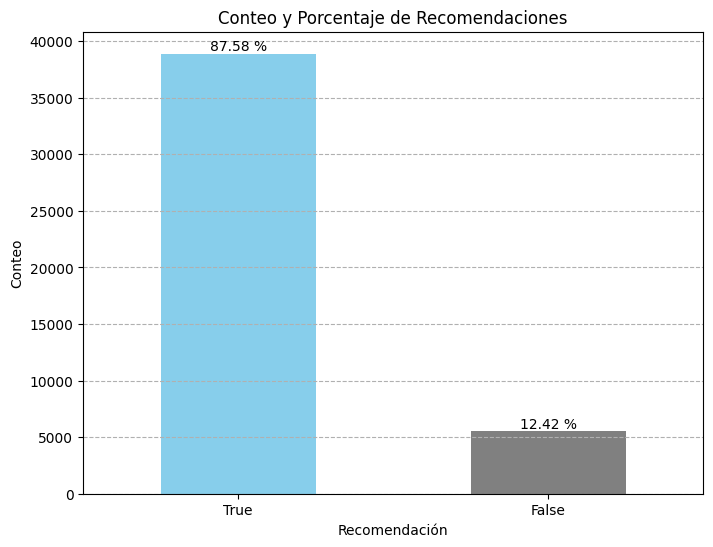

In [5]:
# Graficamos el resultado
fig, ax = plt.subplots(figsize=(8, 6))
bars = df_recomendaciones["Conteo"].plot(kind="bar", color=["skyblue", "gray"], ax=ax)

# Agregamos etiquetas con porcentajes encima de cada barra
for bar, percentage in zip(bars.patches, df_recomendaciones["Porcentaje"]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 5, f'{percentage}', ha="center", va="bottom")

ax.set_title("Conteo y Porcentaje de Recomendaciones")
ax.set_xlabel("Recomendación")
ax.set_ylabel("Conteo")
ax.grid(axis="y", linestyle="--")

plt.xticks(rotation=0)
plt.show()

#### - Variable "year"

Con la variable "year" podremos graficar una tendencia a lo largo del tiempo, esto nos dará una perspectiva clara y completa sobre la evolución temporal de las reseñas de usuarios en la plataforma Steam.

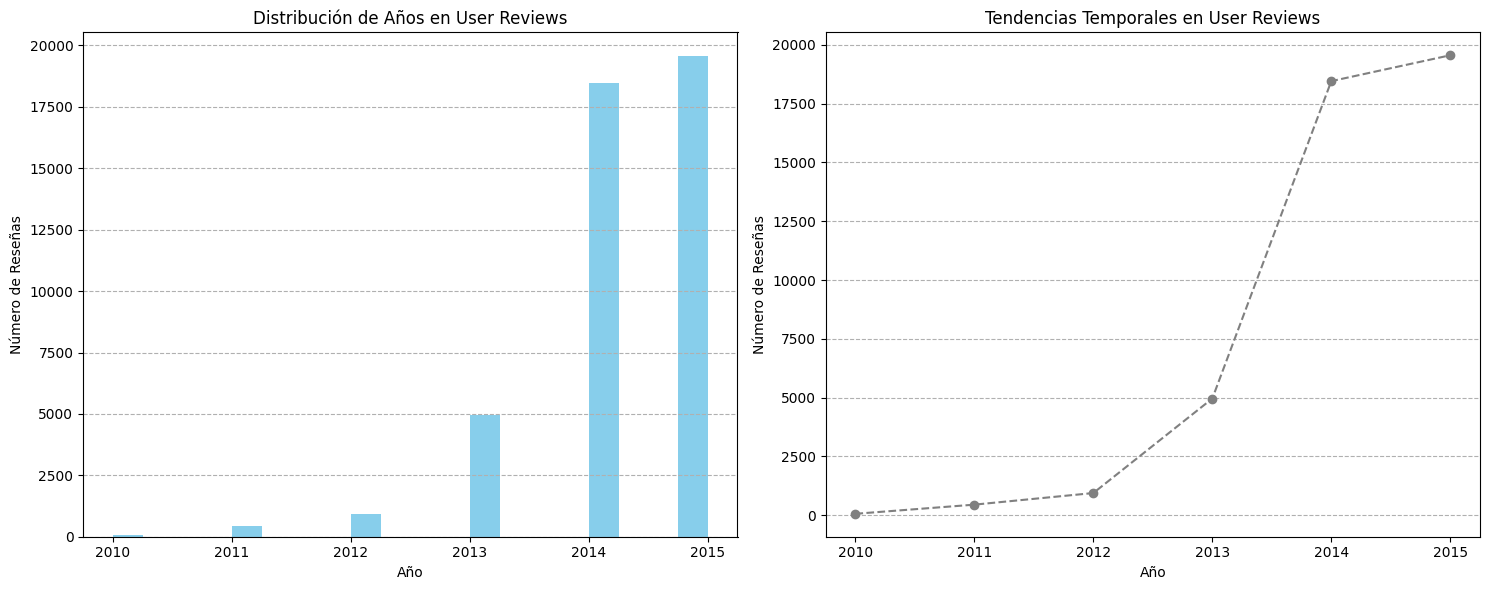

In [6]:
# Creamos subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Histograma de la distribución de años
axs[0].hist(df_UserReviews["year"], bins=20, color="skyblue")
axs[0].set_title("Distribución de Años en User Reviews")
axs[0].set_xlabel("Año")
axs[0].set_ylabel("Número de Reseñas")
axs[0].grid(axis="y", linestyle="--")

# Gráfico de líneas para mostrar tendencias temporales
trends = df_UserReviews["year"].value_counts().sort_index()
axs[1].plot(trends.index, trends.values, marker="o", linestyle="--", color="gray")
axs[1].set_title("Tendencias Temporales en User Reviews")
axs[1].set_xlabel("Año")
axs[1].set_ylabel("Número de Reseñas")
axs[1].grid(axis="y", linestyle="--")

# Ajustar el diseño
plt.tight_layout()

# Mostramos los gráficos
plt.show()

- Análisis de la Distribución de Años mediante un Histograma:
La mayoría de las reseñas se concentran en los años más recientes, particularmente en 2014, 2015, y en menor medida, 2013. El año 2010 tiene la menor cantidad de reseñas, lo que sugiere un aumento significativo en la participación de usuarios con el tiempo y resalta la expansión y la creciente popularidad de la plataforma Steam en los últimos años.

- Representación Gráfica de las Tendencias Temporales:
La tendencia temporal muestra un crecimiento constante en el número de reseñas a lo largo de los años. La línea alcanza su punto máximo en el año 2015, indicando un pico en la actividad de reseñas en ese año.

La relación entre la distribución de años y la tendencia temporal confirma que, aunque hay un aumento general en las reseñas a lo largo del tiempo, hay años específicos que contribuyen de manera significativa a este crecimiento.

#### - Variable "sentiment_analysis"

Se optó por utilizar la biblioteca NLTK (Natural Language Toolkit) con el analizador de sentimientos de Vader, que proporciona una puntuación compuesta que puede ser utilizada para clasificar la polaridad de las reseñas en negativas (valor '0'), neutrales (valor '1') o positivas (valor '2'). A las reseñas escritas ausentes, se les asignó el valor de '1'.

Justificación:

- Facilidad de Implementación:
NLTK es una biblioteca de procesamiento de lenguaje natural popular en Python, y el analizador de sentimientos de Vader es fácil de implementar. Requiere menos configuración en comparación con algunos enfoques más avanzados y es adecuado para aplicaciones prácticas.

- Eficiencia Computacional:
El analizador de sentimientos de Vader es eficiente computacionalmente, lo que significa que puede manejar grandes conjuntos de datos sin un costo computacional excesivo. Esto es crucial para aplicaciones en entornos empresariales donde la eficiencia de procesamiento es esencial.

- Polaridad Compuesta:
La puntuación compuesta proporcionada por el analizador de sentimientos de Vader ofrece una representación única y fácil de interpretar de la polaridad de la reseña. Esta puntuación compuesta se utiliza para asignar valores numéricos a las categorías de sentimientos según la escala propuesta.

- Niveles Aceptables de Precisión:
Aunque el analizador de sentimientos de Vader no es perfecto y puede tener limitaciones en ciertos contextos, es conocido por su rendimiento aceptable en una variedad de situaciones prácticas. La precisión puede variar según el tipo de texto y el dominio, pero en general, proporciona resultados razonables para tareas de análisis de sentimientos.

Es importante destacar que la precisión de cualquier método de análisis de sentimientos puede depender en gran medida del contexto específico del conjunto de datos y del lenguaje utilizado en las reseñas. Si la precisión es una preocupación principal y el conjunto de datos lo permite se podría considerar para una segunda fase enfoques más avanzados, como modelos de aprendizaje profundo entrenados para análisis de sentimientos.

En resumen, el enfoque seleccionado con el analizador de sentimientos de Vader en NLTK se elige por su equilibrio entre facilidad de implementación, eficiencia computacional y niveles aceptables de precisión para el propósito del análisis de sentimientos en este contexto específico.

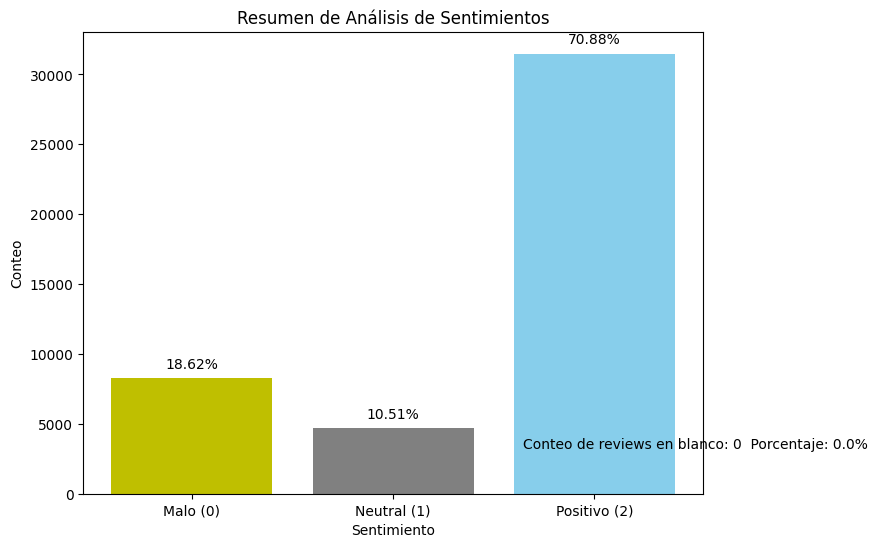

In [7]:
# Calculamos el resumen de análisis de sentimientos

sentiment_summary = df_UserReviews["sentiment_analysis"].value_counts()
percentage_summary = (df_UserReviews["sentiment_analysis"].value_counts(normalize=True) * 100).round(2)

# Creamos un nuevo DataFrame con el resumen
resumen_sentimientos = pd.DataFrame({
    "Conteo": sentiment_summary,
    "Porcentaje": percentage_summary.astype(str) + "%"
})

# Ordenamos el DataFrame por el conteo de mayor a menor
resumen_sentimientos = resumen_sentimientos.sort_index()

# Visualizamos el resumen
fig, ax = plt.subplots(figsize=(8, 6))

# Creamos barras para el conteo
ax.bar(resumen_sentimientos.index, resumen_sentimientos["Conteo"], color=["y", "gray", "skyblue"])

# Mostramos porcentajes encima de las barras
for i, v in enumerate(resumen_sentimientos["Porcentaje"]):
    ax.text(i, resumen_sentimientos["Conteo"][i] + 500, f'{v}', ha="center", va="bottom")

# Configuramos el gráfico
ax.set_title("Resumen de Análisis de Sentimientos")
ax.set_xlabel("Sentimiento")
ax.set_ylabel("Conteo")
ax.set_xticks(resumen_sentimientos.index)
ax.set_xticklabels(["Malo (0)", "Neutral (1)", "Positivo (2)"])

# Mostramos el conteo de reviews en blanco
conteo_reviews_en_blanco = (df_UserReviews["sentiment_analysis"].isnull()).sum()
porcentaje_reviews_en_blanco = (conteo_reviews_en_blanco / len(df_UserReviews) * 100).round(2)
ax.text(2.5, 3000, f"Conteo de reviews en blanco: {conteo_reviews_en_blanco}  Porcentaje: {porcentaje_reviews_en_blanco}%", ha="center", va="bottom")

plt.show()

En el análisis de sentimientos de las reseñas en la columna 'sentiment_analysis', observamos lo siguiente:

- Positivo (2):
Representa la categoría dominante en las reseñas, abarcando el 70.83% del total. Esto indica que la gran mayoría de las reseñas tiene un sentimiento positivo.

- Neutral (1):
Aunque en menor proporción, un 10.53% de las reseñas se clasifican como neutrales. Esto podría indicar que algunos usuarios expresan opiniones sin un sesgo claramente positivo o negativo.

- Negativo (0):
La categoría de sentimiento negativo tiene una presencia más baja, constituyendo el 18.63%. Esto sugiere que, en general, la plataforma tiene una inclinación positiva en las reseñas de los usuarios.

Consideraciones: La mayoría de los usuarios tiende a expresar opiniones positivas en sus reseñas.La proporción de reseñas neutrales es relativamente baja, lo que indica que la mayoría de los usuarios tiende a tener opiniones claramente positivas o negativas.

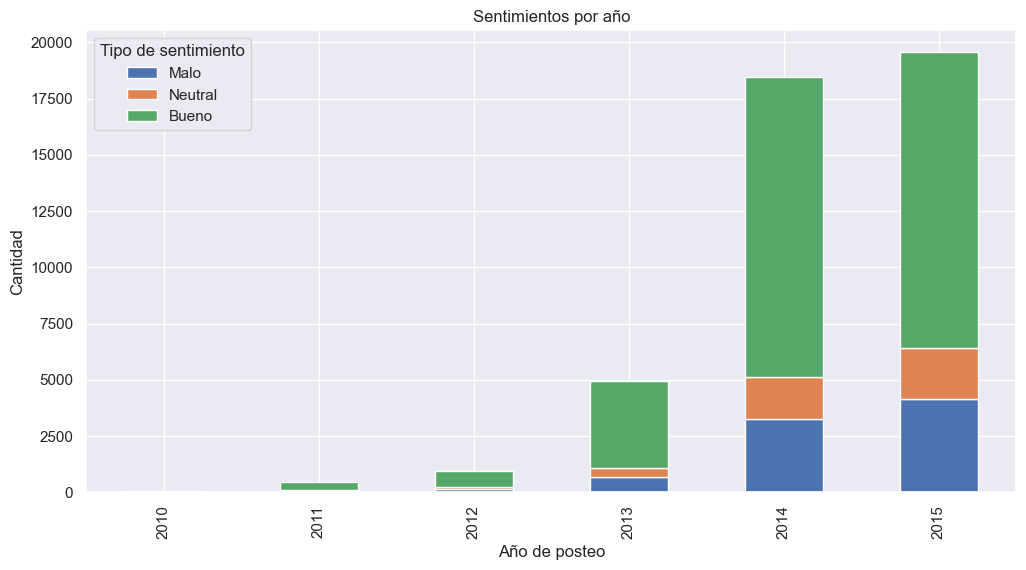

In [8]:
# Creamos un gráfico de barras para observar los sentimientos por cada año
sentimiento_colores = {
    0: ('Malo'),  
    1: ('Neutral'),
    2: ('Bueno') 
}

grouped_data = df_UserReviews.groupby(['year', 'sentiment_analysis']).size().reset_index(name='count')
pivot_data = grouped_data.pivot(index='year', columns='sentiment_analysis', values='count')
sns.set(style='darkgrid')
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6))

handles, labels = ax.get_legend_handles_labels()
custom_labels = [sentimiento_colores[int(label)] for label in labels]
ax.legend(handles, custom_labels, title='Tipo de sentimiento', loc='upper left')
plt.ylabel('Cantidad')
plt.xlabel('Año de posteo')
plt.title('Sentimientos por año')
plt.show()

### 4. Nube de palabras con los géneros de los juegos

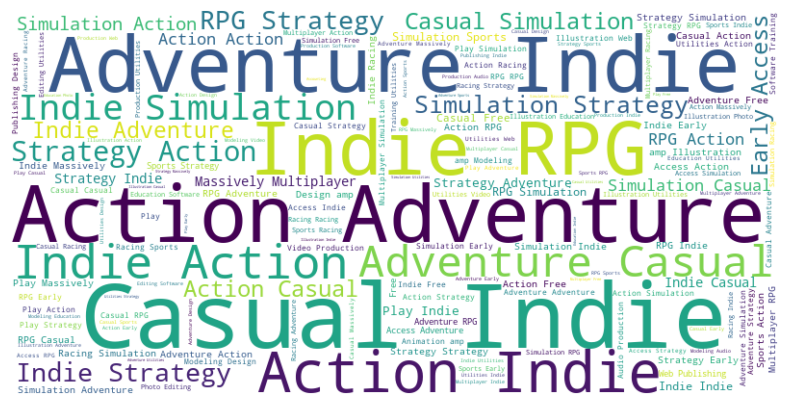

In [9]:
# Unimos todos los géneros en una sola cadena separada por comas
all_genres = ','.join(df_steam_games['genres'])

# Creamos la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genres)

# Mostramos la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()